<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Standard-Data-Science-Packages" data-toc-modified-id="Import-Standard-Data-Science-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Standard Data Science Packages</a></span><ul class="toc-item"><li><span><a href="#Set-Colorblind-Friendly-Palette" data-toc-modified-id="Set-Colorblind-Friendly-Palette-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Set Colorblind-Friendly Palette</a></span></li></ul></li><li><span><a href="#Load-and-Visualise-qPCR-Data" data-toc-modified-id="Load-and-Visualise-qPCR-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load and Visualise qPCR Data</a></span></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Organise-Data" data-toc-modified-id="Organise-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Organise Data</a></span></li><li><span><a href="#Define-ACA-Model-(Neural-Network)" data-toc-modified-id="Define-ACA-Model-(Neural-Network)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Define ACA Model (Neural Network)</a></span></li><li><span><a href="#Train-and-Compute-Performance-(10-Fold-Cross-Val)" data-toc-modified-id="Train-and-Compute-Performance-(10-Fold-Cross-Val)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Train and Compute Performance (10-Fold Cross Val)</a></span></li><li><span><a href="#Visualise-AMCA-Coefficients" data-toc-modified-id="Visualise-AMCA-Coefficients-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Visualise AMCA Coefficients</a></span></li><li><span><a href="#Compute-Performance-as-a-Function-of-Training-Volume" data-toc-modified-id="Compute-Performance-as-a-Function-of-Training-Volume-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Compute Performance as a Function of Training Volume</a></span></li></ul></li></ul></div>

# Import Standard Data Science Packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

import utilities as utils

## Set Colorblind-Friendly Palette

In [2]:
import matplotlib as mpl
from cycler import cycler
from matplotlib.colors import to_hex
mpl.rcParams['axes.prop_cycle'] = cycler(color=[to_hex(i) for i in
                                                [(0,0.45,0.70),
                                                (0.9, 0.6, 0.0),
                                                (0.0, 0.60, 0.50),
                                                (0.8, 0.4, 0),
                                                (0.35, 0.7, 0.9),
                                                (0.8, 0.6, 0.7),
                                                (0,0,0),
                                                (0.5, 0.5, 0.5),
                                                (0.286, 0, 0.573)]])

# Load and Visualise qPCR Data

In [15]:
df_qpcr_ampl = pd.read_csv('Data/qPCR_Amplification_Curves2.csv', 
                           index_col=0)

df_qpcr_ampl.columns = [float(col) if i > 5 else col for i, col in enumerate(df_qpcr_ampl.columns) ]

df_qpcr_ampl.head()

,PrimerMix,Target,Assay,Conc,Exp_id,MeltPeaks,1.0,2.0,3.0,4.0,...,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0
0,PM9.8,mcr-1,G10,10,20200520_02,87.3357,-0.0012,-0.0006,-0.0001,0.0009,...,0.1371,0.2070,0.2786,0.3381,0.3829,0.4197,0.4495,0.4738,0.4954,0.5122
1,PM9.8,mcr-1,G10,10,20200520_02,87.4206,-0.0018,-0.0006,0.0001,0.0010,...,0.2522,0.3284,0.3879,0.4336,0.4715,0.5024,0.5276,0.5498,0.5674,0.5824
2,PM9.8,mcr-1,G10,10,20200520_02,87.1996,-0.0012,-0.0006,0.0001,0.0008,...,0.2142,0.2806,0.3331,0.3738,0.4065,0.4344,0.4562,0.4755,0.4915,0.5052
3,PM9.8,mcr-1,G10,10,20200520_02,87.4470,-0.0016,-0.0006,0.0001,0.0009,...,0.1672,0.2424,0.3121,0.3660,0.4077,0.4424,0.4709,0.4943,0.5142,0.5307
4,PM9.8,mcr-1,G10,10,20200520_02,87.2524,-0.0009,-0.0005,0.0001,0.0003,...,0.1800,0.2535,0.3180,0.3663,0.4053,0.4373,0.4636,0.4857,0.5039,0.5201


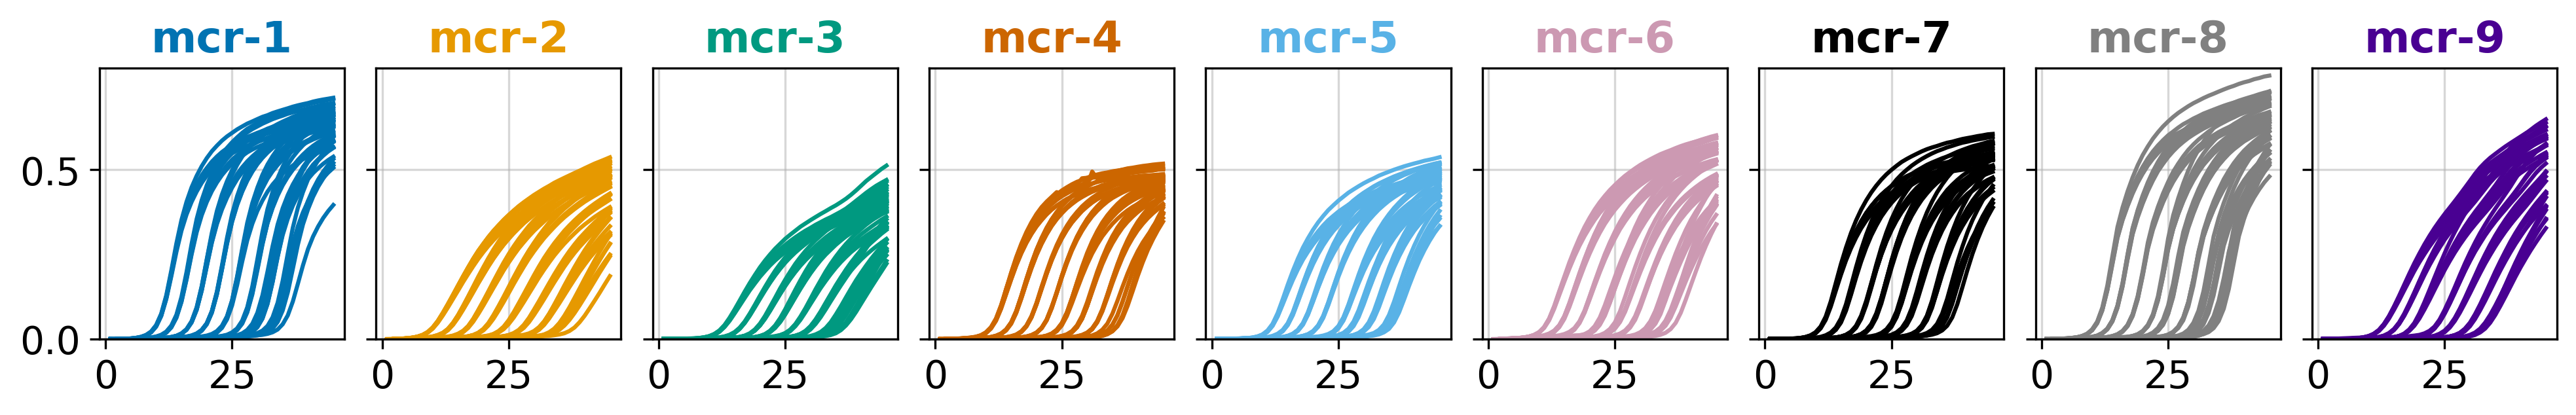

In [16]:
filename = 'Images/qPCR_amplification_curves.png'
utils.plot_amplification_curves(df_qpcr_ampl, NMETA=6, ylim=(0, 0.8), filename=filename)

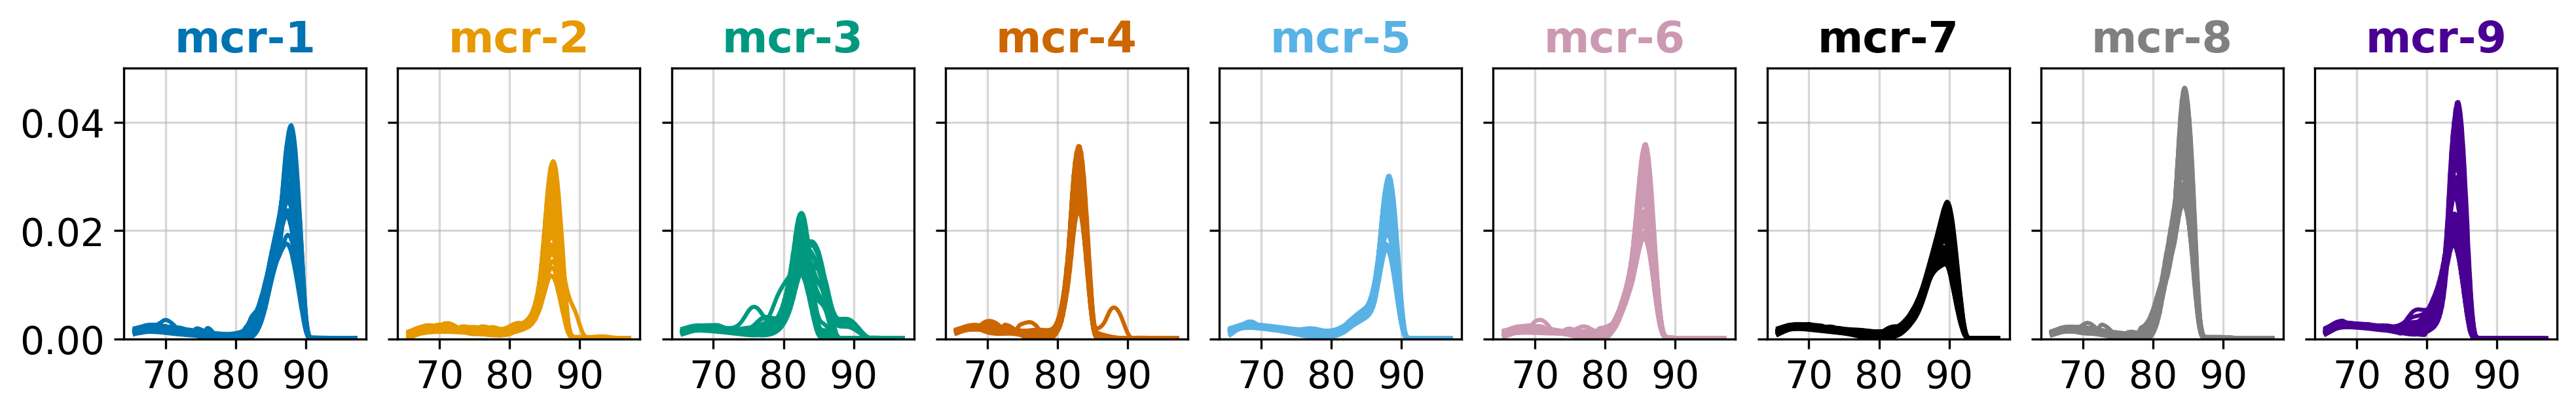

In [5]:
df_qpcr_melt = pd.read_csv('Data/qPCR_Melting_Curves.csv', 
                           index_col=0)

filename = 'Images/qPCR_melting_curves.png'
utils.plot_melt_curves(df_qpcr_melt, NMETA=6, ylim=(0, 0.05), filename=filename)

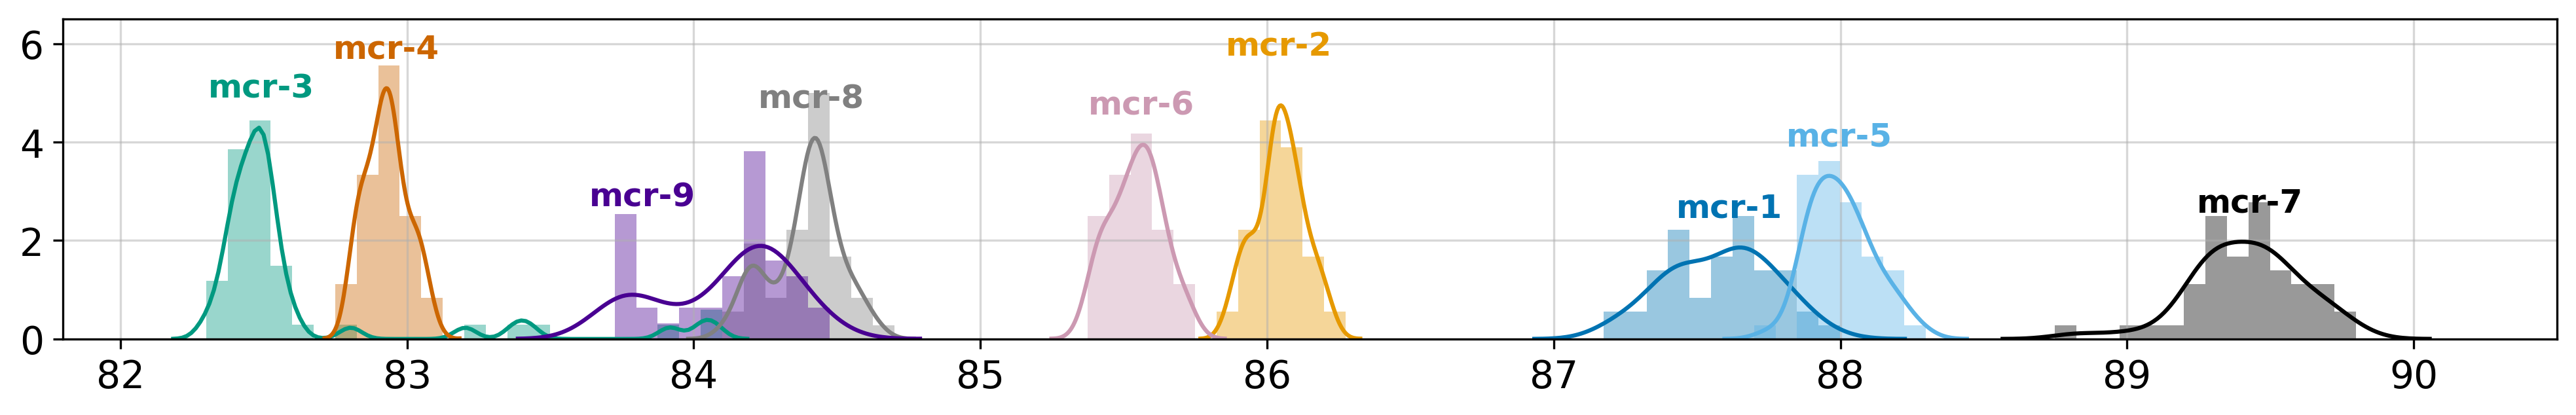

,mcr-1,mcr-2,mcr-3,mcr-4,mcr-5,mcr-6,mcr-7,mcr-8,mcr-9
Mean,87.578831,86.044786,82.629492,82.928731,88.003931,85.544348,89.414480,84.389506,84.108803
Median,87.611951,86.041167,82.490550,82.928725,87.995300,85.561498,89.429755,84.410798,84.188365
MaxLikelihood,87.644939,86.048652,82.483831,82.927395,87.961985,85.566879,89.398975,84.420824,84.237166
Std,0.180508,0.084268,0.434515,0.071168,0.108800,0.088920,0.189037,0.119926,0.222068
IQR,0.262082,0.096976,0.104835,0.095555,0.149004,0.119171,0.237076,0.121520,0.347191


In [4]:
filename = 'Images/qPCR_melting_peaks.png'
utils.plot_melt_peak_distributions(df_qpcr_ampl, filename=filename)

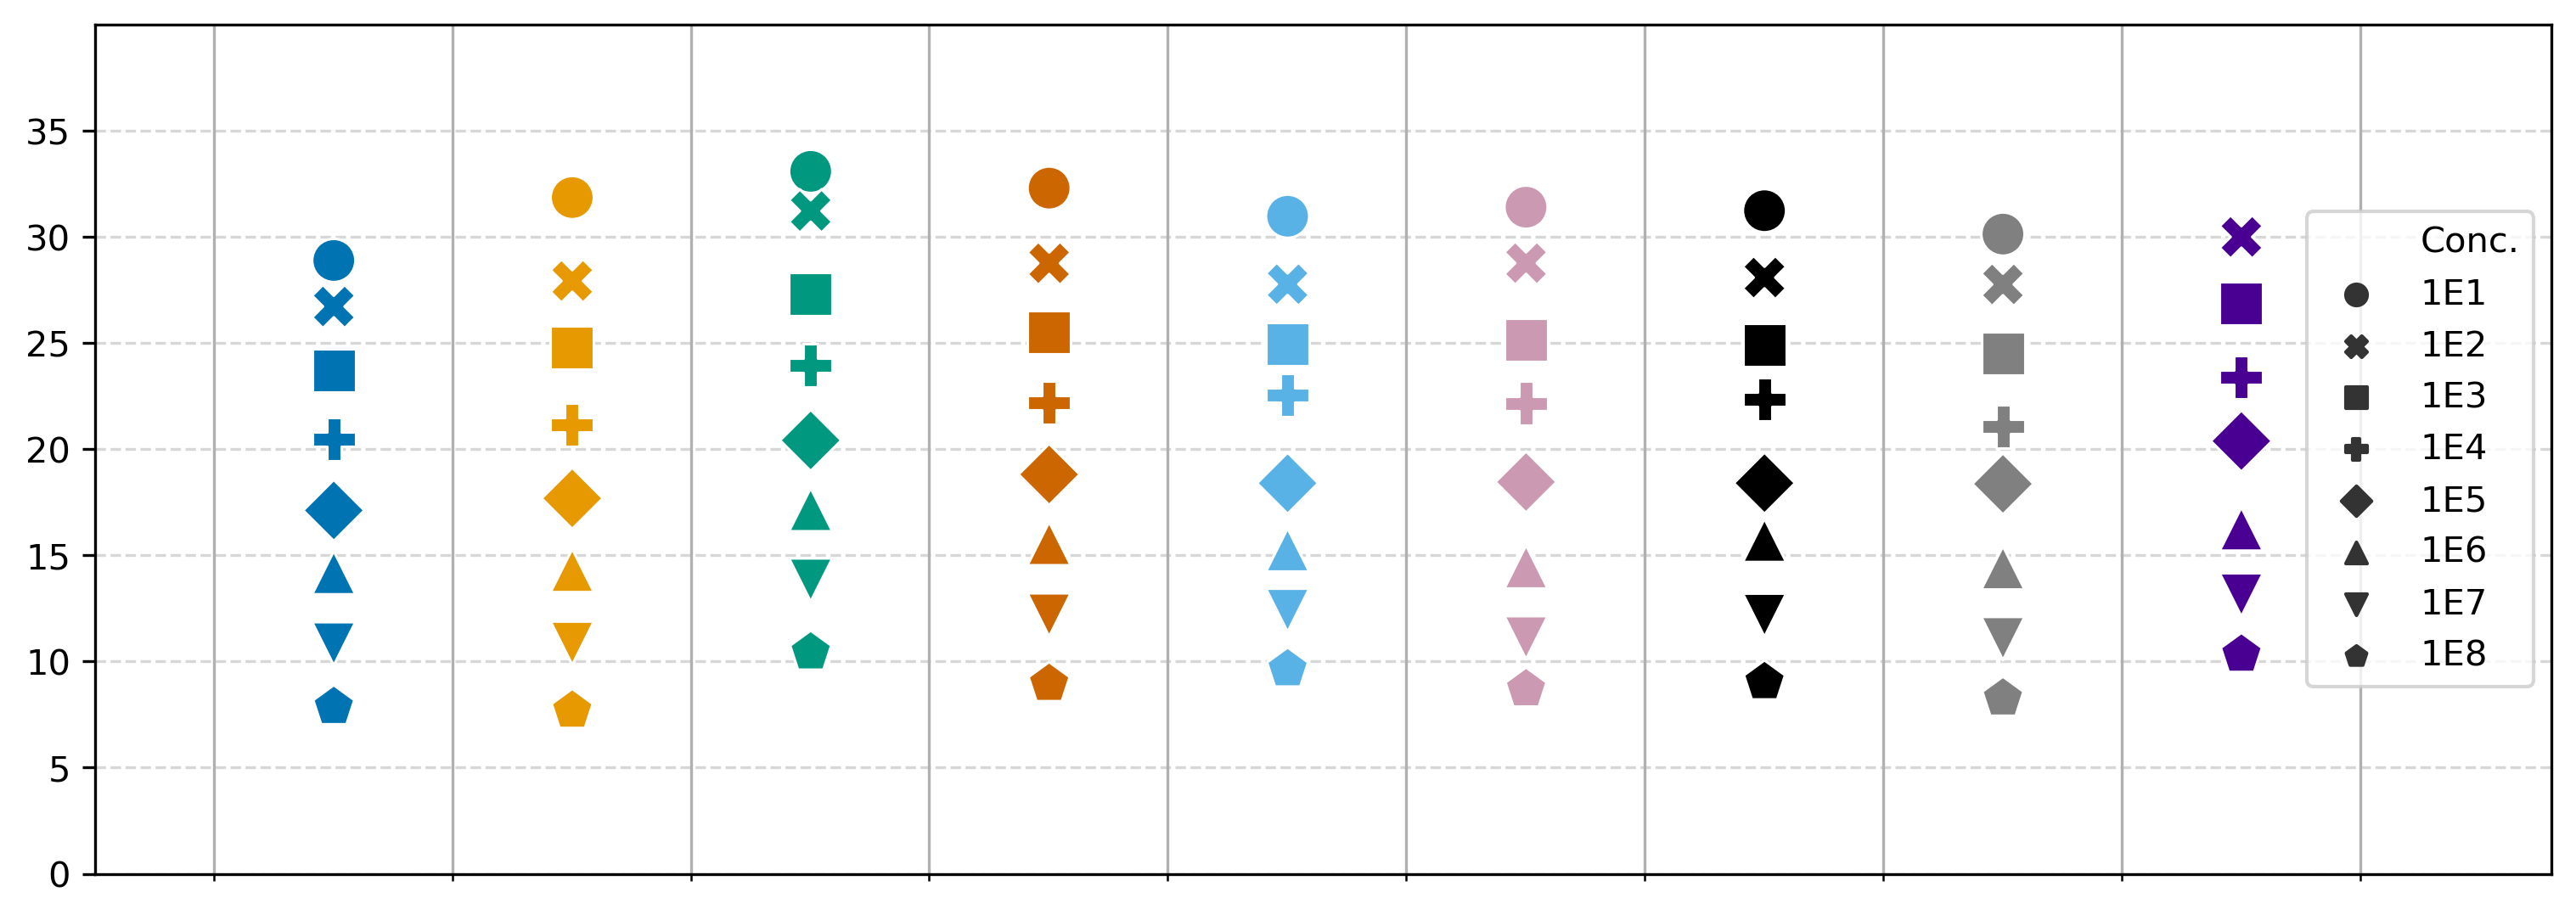

In [7]:
filename = 'Images/qPCR_standard_curves.png'
utils.plot_standard_curves(df_qpcr_ampl, NMETA=6, filename=filename)

In [8]:
import statsmodels.api as sm

ms = []
cs = []
rsqrs = []
effs = []

for target, df_ in df_qpcr_ampl.groupby('Target'):
    x_ = np.log10(df_['Conc'])
    y_ = utils.compute_cts(df_.iloc[:, 6:].transpose().copy(), thresh=0.01)
    
    model = sm.OLS(y_, sm.add_constant(x_))
    
    results = model.fit()
    
    m = results.params["Conc"]
    c = results.params["const"]
    rsqr = results.rsquared
    eff = 100 * (10**(-1/results.params["Conc"]) - 1)
    
    ms.append(m)
    cs.append(c)
    rsqrs.append(rsqr)
    effs.append(eff)
    
#     display(results.summary())

pd.DataFrame({'m': ms, 'c': cs, 'rsqr': rsqrs, 'eff': effs})

,m,c,rsqr,eff
0,-3.078594,32.580814,0.995116,111.263060
1,-3.445509,35.035070,0.997392,95.089039
2,-3.365830,37.381276,0.996193,98.199941
3,-3.326506,35.498755,0.998121,99.809304
4,-3.087895,34.138645,0.995884,110.787656
5,-3.368771,35.187370,0.993069,98.081593
6,-3.172416,34.510478,0.997109,106.641338
7,-3.208660,33.890496,0.994863,104.954094
8,-3.343474,36.766910,0.996373,99.108646


# Data Analysis
## Organise Data

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

X_AC = df_qpcr_ampl.iloc[:, 6:].values
X_MC = df_qpcr_ampl.loc[:, ['MeltPeaks']].values
X_FFI = X_AC[:,[-1]]

encoder = LabelEncoder()
encoder.fit(df_qpcr_ampl['Target'])
ytrue = encoder.transform(df_qpcr_ampl['Target'])

X_MC.shape, X_AC.shape, X_FFI.shape, ytrue.shape

((423, 1), (423, 45), (423, 1), (423,))

## Define ACA Model (Neural Network)

In [5]:
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

class myWrapper(KerasClassifier):
    def predict(self, X):
        return self.model.predict(X).argmax(axis=1)
    
    def predict_proba(self, X):
        return self.model.predict(X)

display(f'TF VERSION: {tf.__version__}')

def create_model(): # 70% WE USED FOR THE FIRST TIME TNSOR BOARD
    # TIMESTEPS, CHANNELS
    inputs = tf.keras.layers.Input(shape=(45, 1))
    x = tf.keras.layers.Conv1D(16, 5, activation='relu')(inputs)
    x = tf.keras.layers.Conv1D(8, 3, activation='relu')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(9, activation='softmax')(x)
    model = tf.keras.models.Model(inputs=inputs, outputs=x)
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

tf_net = create_model()
tf_net.summary()

'TF VERSION: 2.2.0'

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 45, 1)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 41, 16)            96        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 39, 8)             392       
_________________________________________________________________
flatten (Flatten)            (None, 312)               0         
_________________________________________________________________
dense (Dense)                (None, 9)                 2817      
Total params: 3,305
Trainable params: 3,305
Non-trainable params: 0
_________________________________________________________________


## Train and Compute Performance (10-Fold Cross Val)

In [6]:
N_SPLITS = 10

kfolds = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=0)
splits = kfolds.split(X_AC, ytrue)

y_trues_ = []
y_preds_ = []

y_preds_AC_ = []
y_preds_MC_ = []
y_preds_FFI_ = []
    
for i, (train_index, test_index) in enumerate(tqdm(splits, total=N_SPLITS)):

    X_MC_train, X_MC_test = X_MC[train_index], X_MC[test_index]
    X_AC_train, X_AC_test = X_AC[train_index], X_AC[test_index]
    X_FFI_train, X_FFI_test = X_FFI[train_index], X_FFI[test_index]
    
    y_train, y_test = ytrue[train_index], ytrue[test_index]
    
    ########## create/train model for MC ##########    
    clf_MC = LogisticRegression(max_iter=1000)
    clf_MC.fit(X_MC_train, y_train)
    clf_MC_proba = clf_MC.predict_proba(X_MC_train)
        
    ########## create/train model for AC ##########
    clf_AC = myWrapper(build_fn=create_model, 
                            epochs=1500, 
                            batch_size=512, 
                            shuffle=True,
                            verbose=False)
    clf_AC.fit(X_AC_train, y_train)
    clf_AC_proba = clf_AC.predict_proba(X_AC_train)
    
    ########## create/train model for FFI ##########
    clf_FFI = LogisticRegression(max_iter=1000)
    clf_FFI.fit(X_FFI_train, y_train)
    clf_FFI_proba = clf_FFI.predict_proba(X_FFI_train)
        
    ########## create/train model for AMCA ##########
    X_AMCA_train = np.concatenate((clf_MC_proba, clf_AC_proba), axis=1)
    
    clf = LogisticRegression(max_iter=1000, fit_intercept=False)
    clf.fit(X_AMCA_train, y_train)
    clf_proba = clf.predict_proba(X_AMCA_train)

    ########## Test models ##########
    y_preds_AC_.append( clf_AC.predict(X_AC_test) )
    y_preds_MC_.append( clf_MC.predict(X_MC_test) )
    y_preds_FFI_.append( clf_FFI.predict(X_FFI_test) )
    
    X_AMCA_test = np.concatenate((clf_MC.predict_proba(X_MC_test), 
                                   clf_AC.predict_proba(X_AC_test)), axis=1)
    
    y_pred = clf.predict(X_AMCA_test)
    
    y_preds_.append( y_pred )
    y_trues_.append( y_test )
    
    
y_trues = np.concatenate(y_trues_)
y_preds = np.concatenate(y_preds_)

y_preds_AC = np.concatenate(y_preds_AC_)
y_preds_MC = np.concatenate(y_preds_MC_)
y_preds_FFI = np.concatenate(y_preds_FFI_)

In [7]:
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from scipy.stats import bartlett, ttest_ind

acc_for_each_fold = lambda x: [accuracy_score(i, j) for i, j in zip(x, y_trues_)]

acc_dict = {'FFI': acc_for_each_fold(y_preds_FFI_),
            'ACA': acc_for_each_fold(y_preds_AC_),
            'MCA': acc_for_each_fold(y_preds_MC_),
            'AMCA': acc_for_each_fold(y_preds_)}
acc = pd.DataFrame(acc_dict)

normality_test = lambda x: sm.stats.lilliefors(x)[1]

variance_test = lambda x: bartlett(x, acc['AMCA'])[1]

ttest = lambda x: ttest_ind(x, acc['AMCA'], equal_var=True)[1]

statistics = lambda x: [np.mean(x), np.std(x), normality_test(x), variance_test(x), ttest(x)]

stats = pd.DataFrame({k: statistics(v) for k, v in acc_dict.items()})

stats.index = ['Mean Acc.', 'Std Acc.', 'Normality p-val.', 'Equal Var. p-val', 'Ttest p-val']

pd.set_option('display.float_format', lambda x: f'{x:.4f}')

stats

/Users/ahmad1374/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


,FFI,ACA,MCA,AMCA
Mean Acc.,0.2458,0.8391,0.8275,0.9410
Std Acc.,0.0460,0.0670,0.0546,0.0338
Normality p-val.,0.6304,0.1817,0.3707,0.2004
Equal Var. p-val,0.3694,0.0534,0.1681,1.0000
Ttest p-val,0.0000,0.0007,0.0000,1.0000


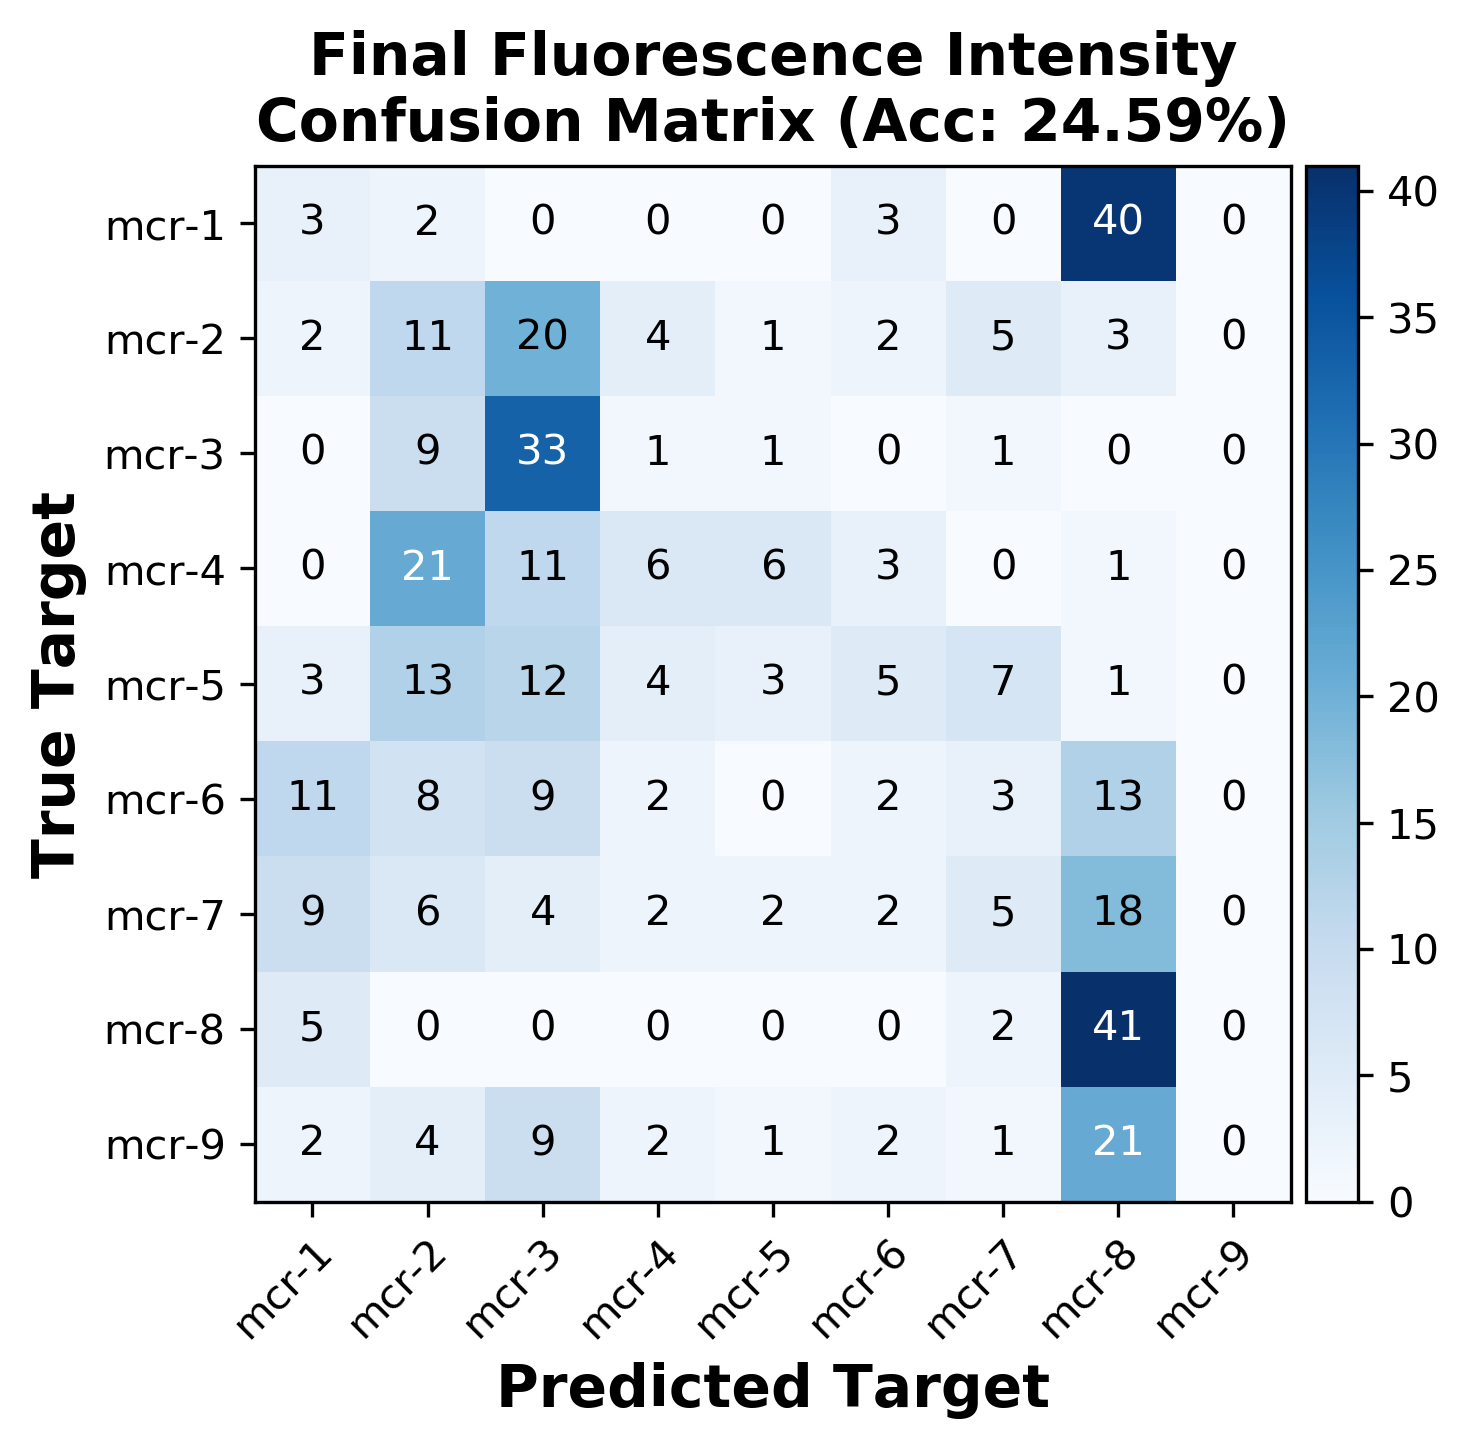

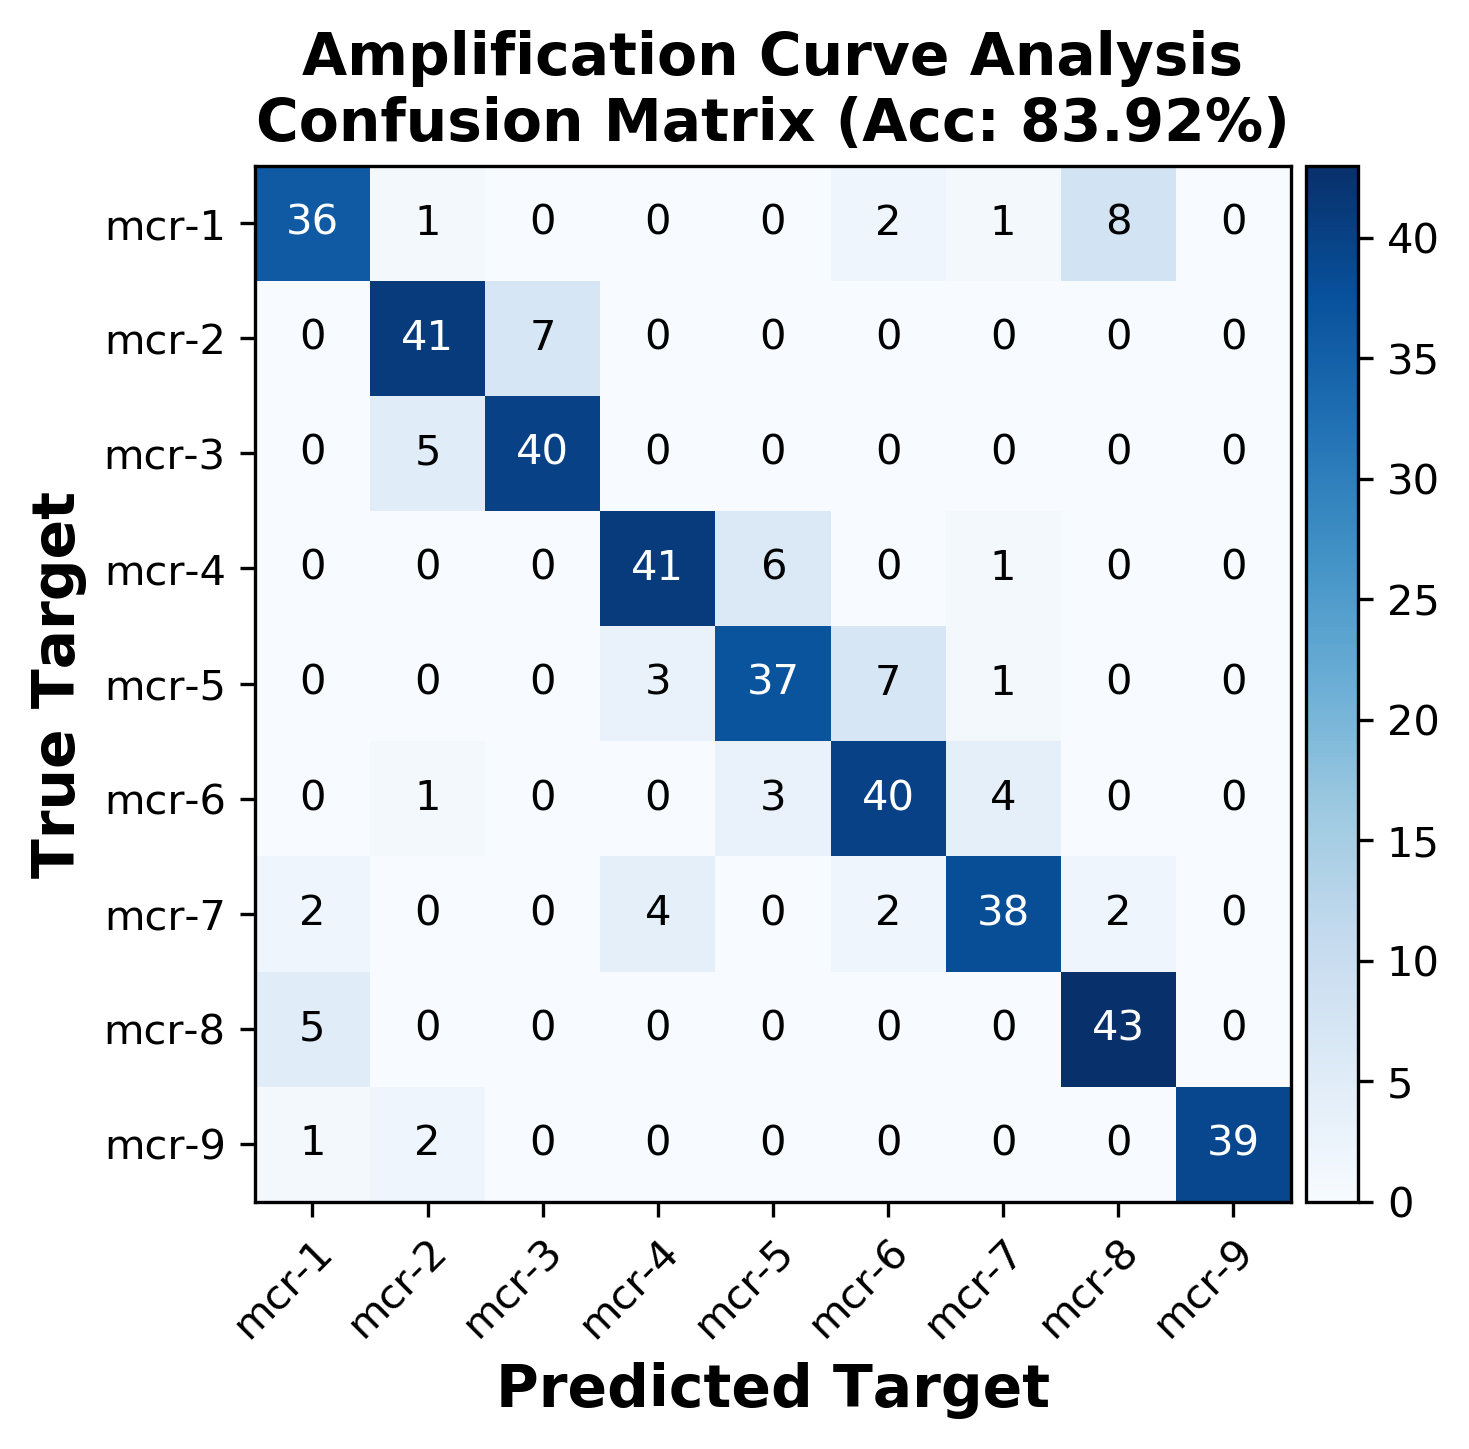

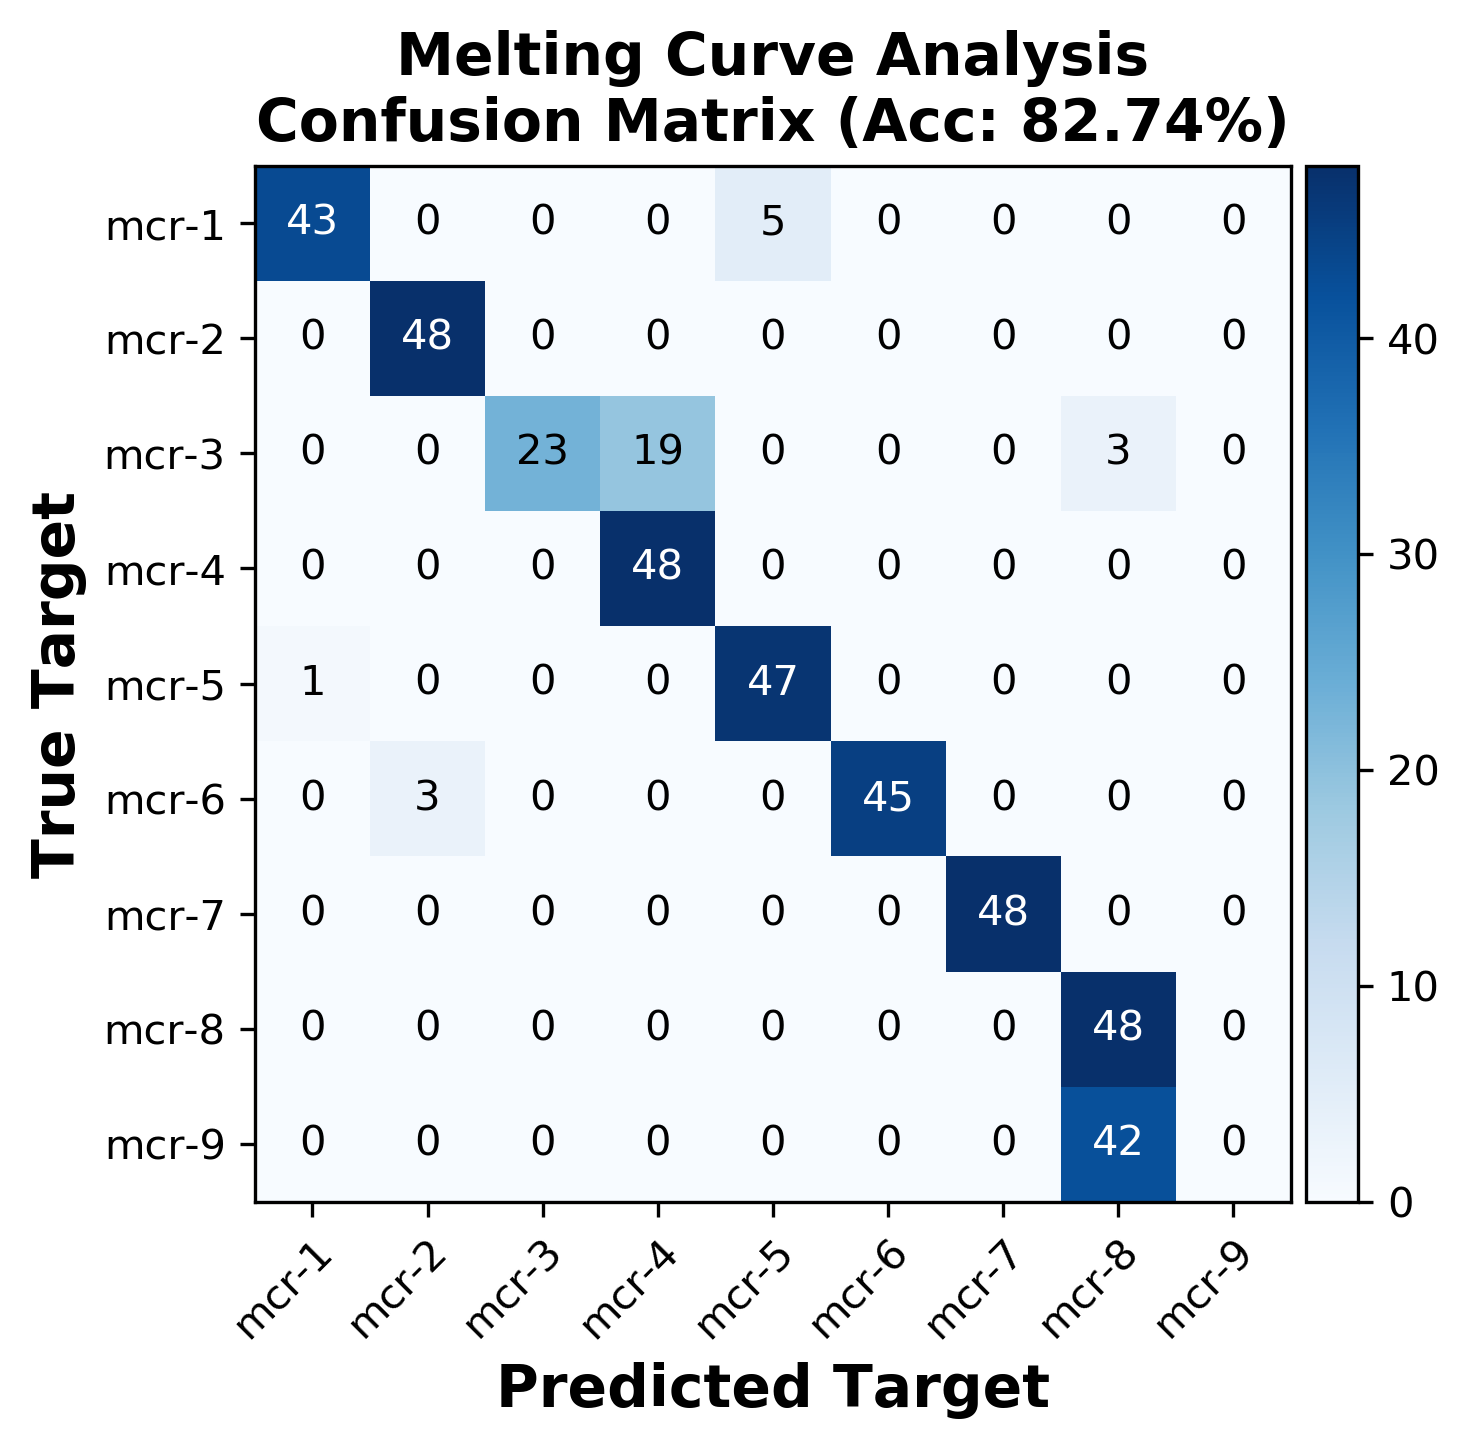

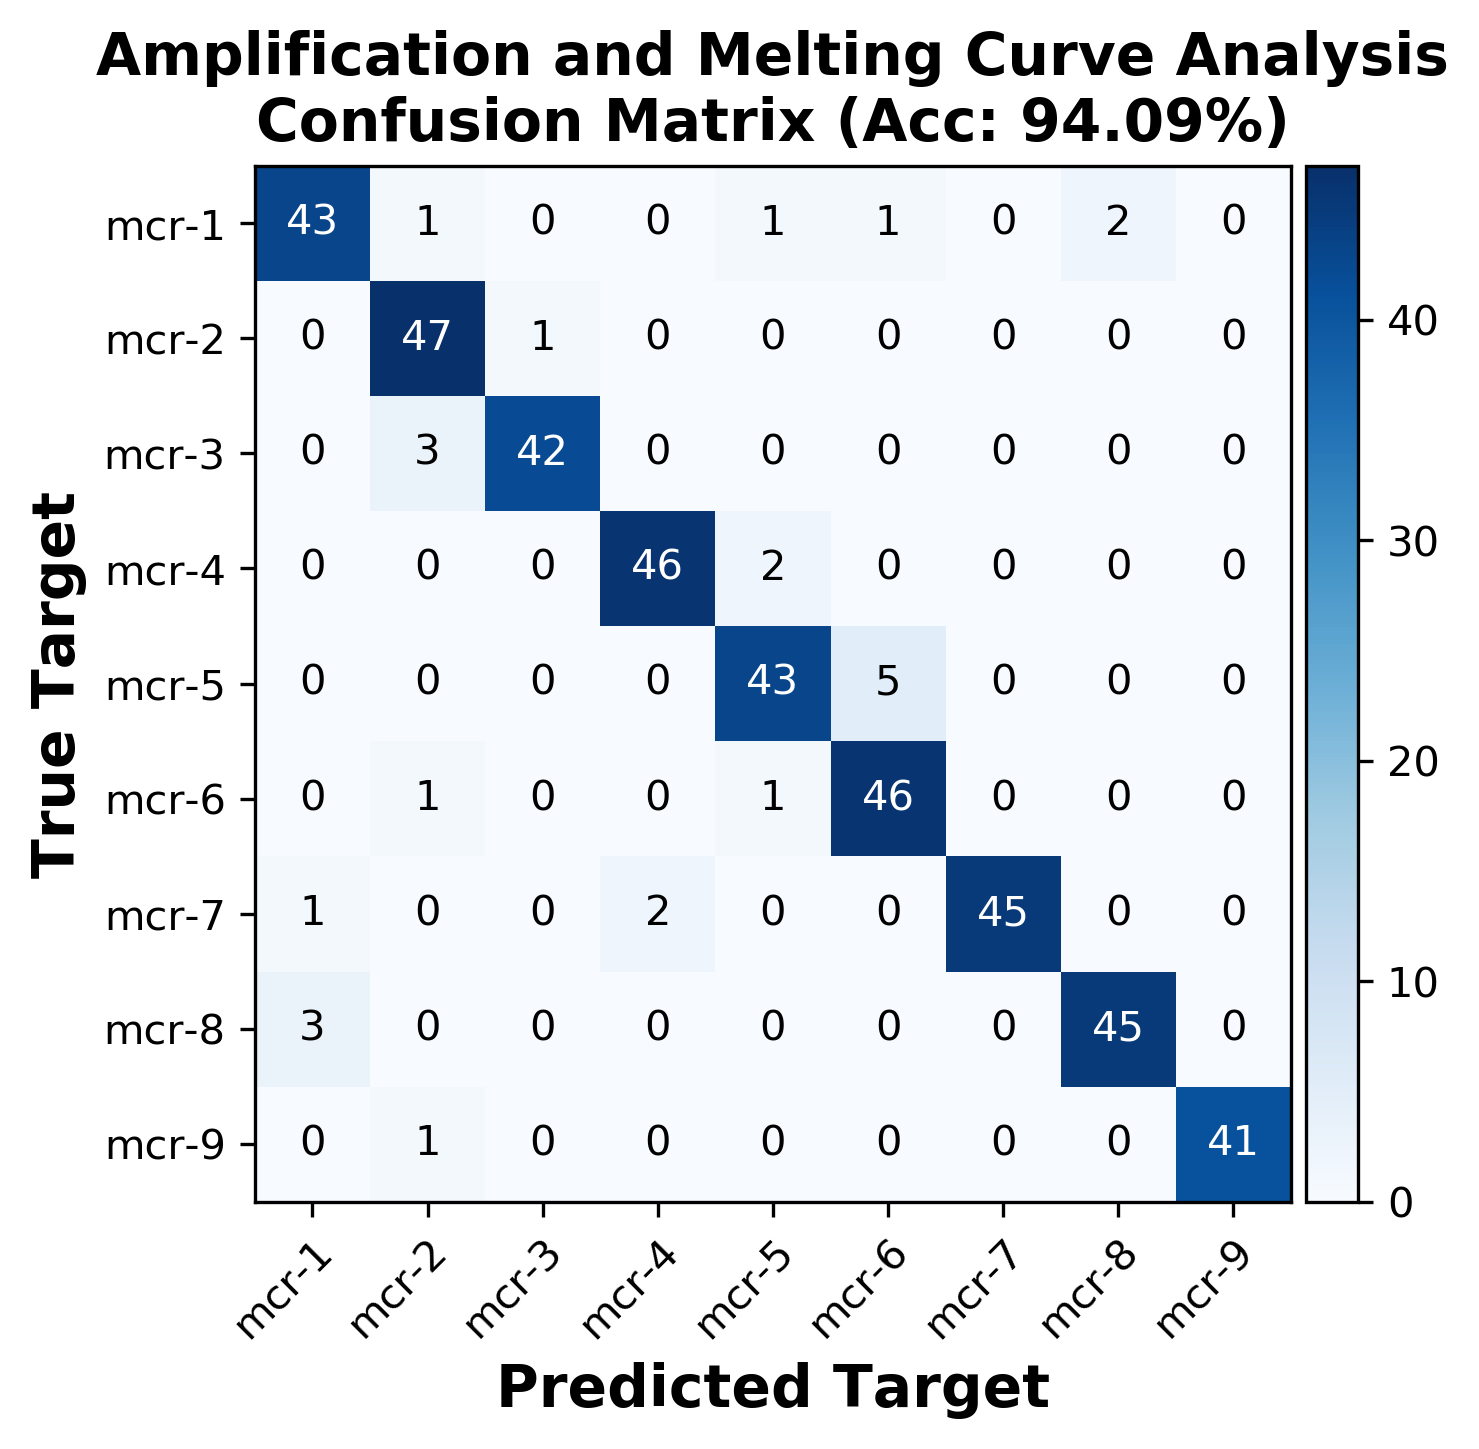

In [8]:
classes = encoder.classes_

ypreds_methods = [y_preds_FFI, y_preds_AC, y_preds_MC, y_preds]
titles = ['Final Fluorescence Intensity',
          'Amplification Curve Analysis',
          'Melting Curve Analysis',
          'Amplification and Melting Curve Analysis']
short_names = ['FFI', 'ACA', 'MCA', 'AMCA']

for yp, title, short_name in zip(ypreds_methods, titles, short_names):

    fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=300)

    utils.plot_confusion_matrix(y_trues, yp, classes, ax, normalize=False)
    ax.set_title(f'{title}\n'+ax.get_title(), fontsize=14, weight='bold')
    ax.set_ylabel('True Target', fontsize=14, weight='bold')
    ax.set_xlabel('Predicted Target', fontsize=14, weight='bold')

    plt.tight_layout()
    plt.savefig(f'Images/qPCR_{short_name}.pdf')
    plt.show()

## Visualise AMCA Coefficients

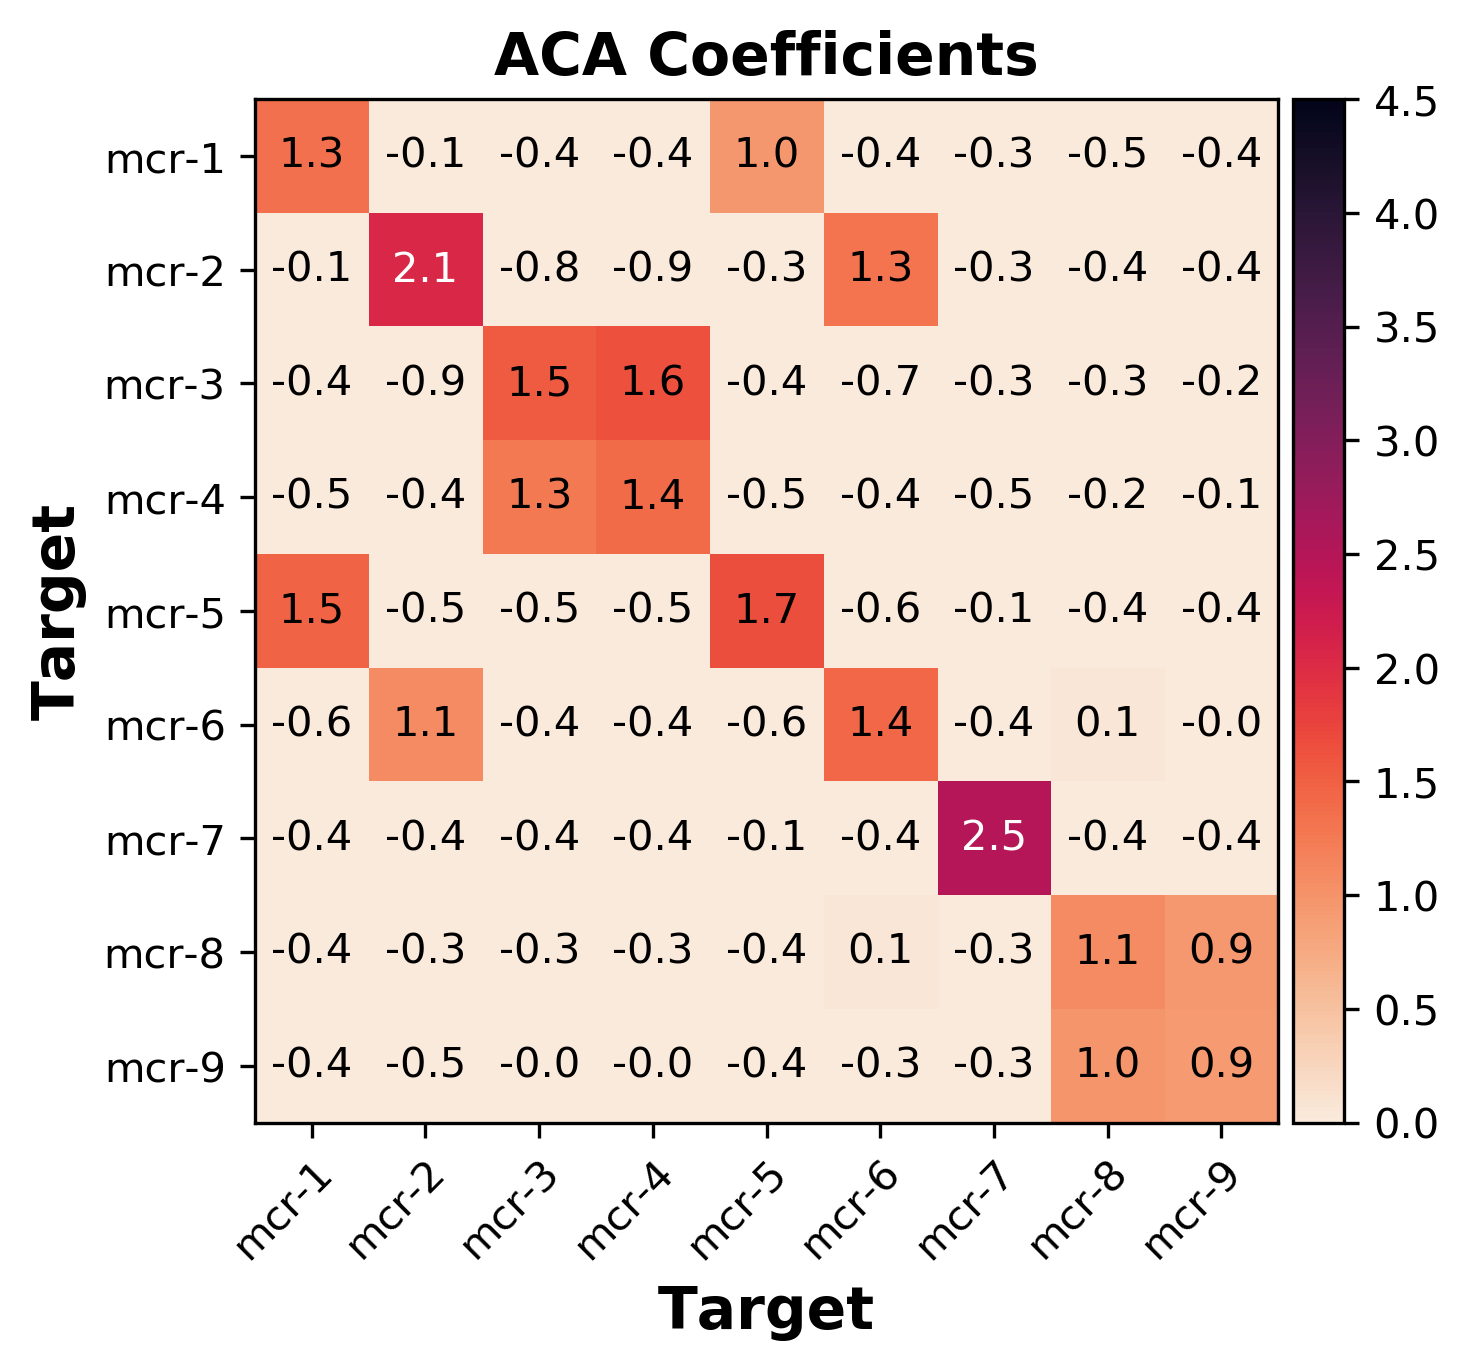

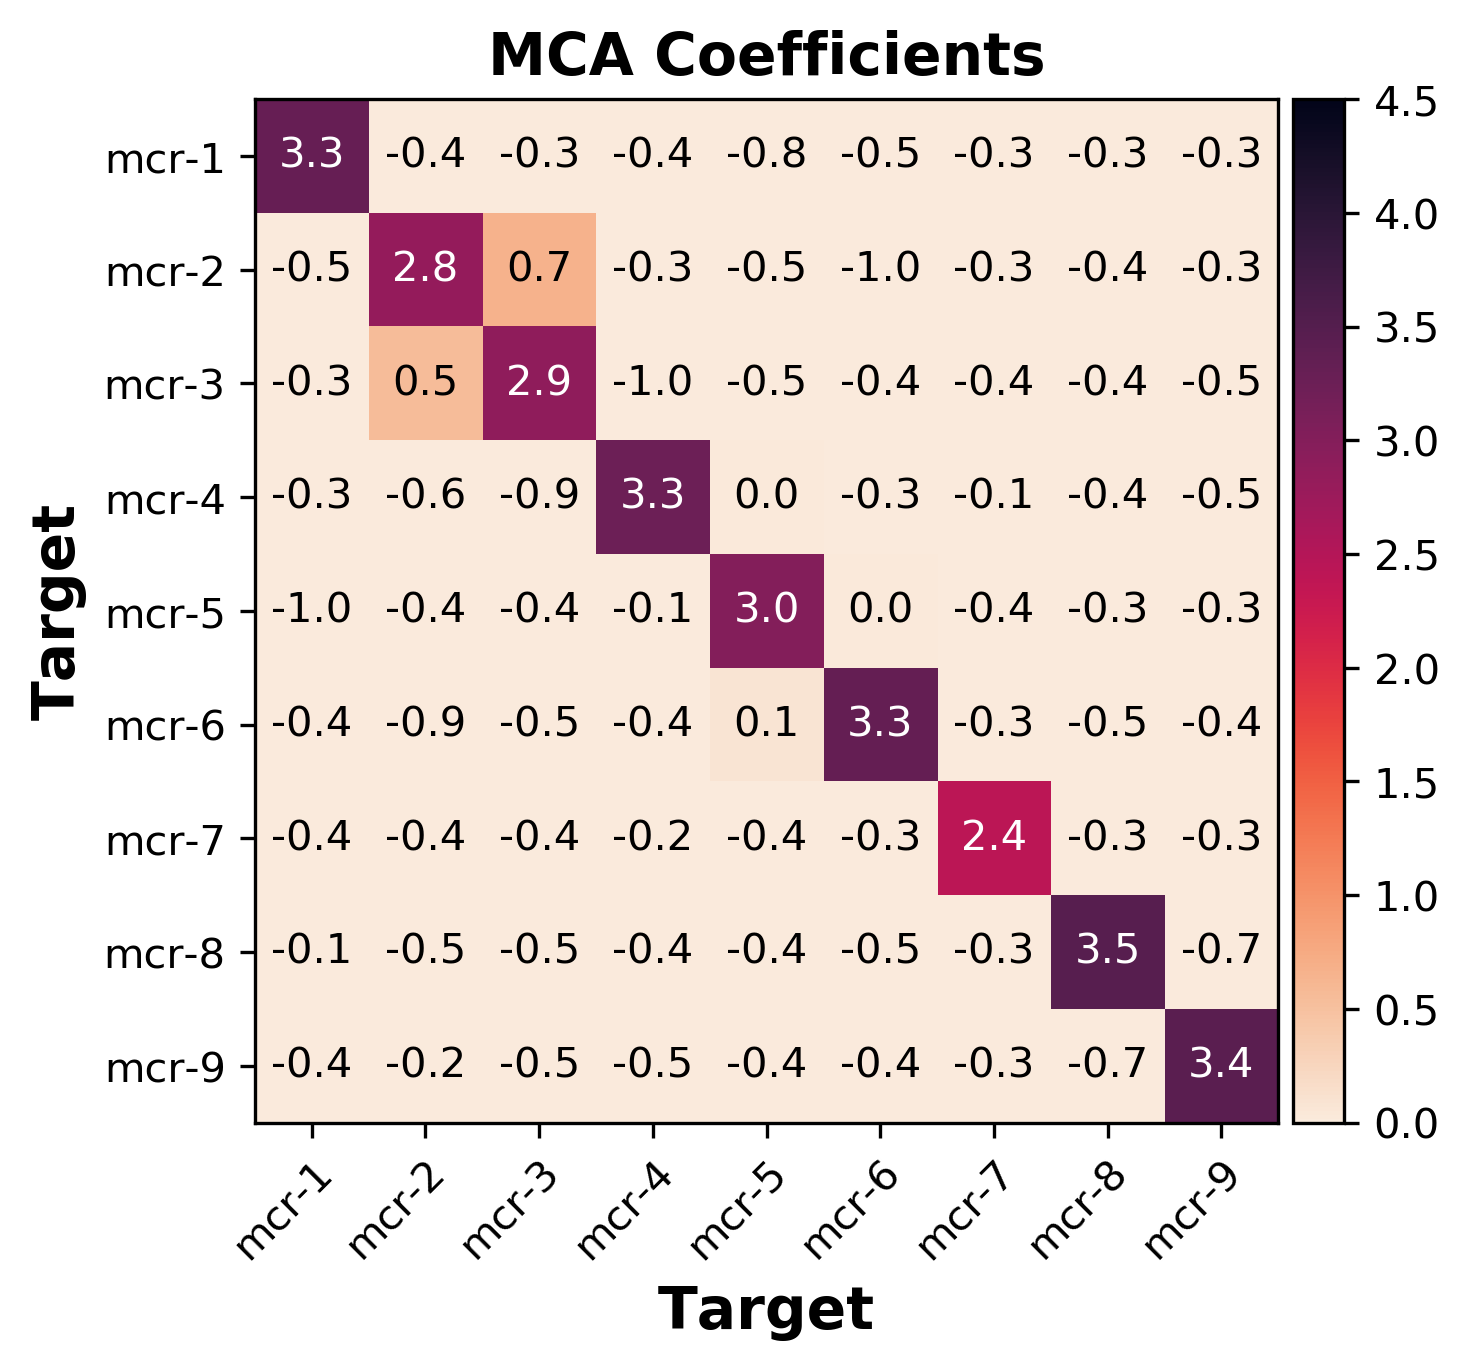

In [9]:
ACA_coef = clf.coef_[:,:9]
MCA_coef = clf.coef_[:,-9:]
    
coefs = [ACA_coef, MCA_coef]
short_names = ['ACA', 'MCA']
    
for coef, short_name in zip(coefs, short_names):
    
    fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=300)

    ax.set_xticks(range(9))
    ax.set_yticks(range(9))
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    utils.my_heatmap(coef, ax, sns.cm.rocket_r)
    ax.set_title(f'{short_name} Coefficients', fontsize=14, weight='bold')
    ax.set_ylabel('Target', fontsize=14, weight='bold')
    ax.set_xlabel('Target', fontsize=14, weight='bold')

    plt.tight_layout()
    plt.savefig(f'Images/qPCR_{short_name}_coeffs.pdf')
    plt.show()

## Compute Performance as a Function of Training Volume

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

n_total = len(X_AC)
assert len(X_AC)==len(X_MC)==len(X_FFI), "Something is wrong!"

n_repeat = 15
n_train_sizes = 20
test_size = 23

# train_size = (10**np.linspace(2, 3, num=n_train_sizes))/n_total
train_size = np.linspace(50, 400, num=n_train_sizes) / n_total

accuracy = pd.DataFrame(columns = ['Method', 'TrainSize', 'Train/Test', 'Accuracy', 'Repeat ID'])

for size in tqdm(train_size, desc='Train Size Split'):

    sss = StratifiedShuffleSplit(n_splits=n_repeat, test_size=test_size/n_total, random_state=0)

    for split_id, (train_index, test_index) in tqdm(enumerate(sss.split(X_AC, ytrue)), 
                                                    total=n_repeat, desc='Repeat', leave=False):
        
        X_MC_train, X_MC_test = X_MC[train_index], X_MC[test_index]
        X_AC_train, X_AC_test = X_AC[train_index], X_AC[test_index]
        X_FFI_train, X_FFI_test = X_FFI[train_index], X_FFI[test_index]

        y_train, y_test = ytrue[train_index], ytrue[test_index]

        X_MC_train = X_MC_train[:int(len(X_MC_train)*size), :]
        X_AC_train = X_AC_train[:int(len(X_AC_train)*size), :]
        X_FFI_train = X_FFI_train[:int(len(X_FFI_train)*size), :]
        y_train = y_train[:int(len(y_train)*size)]

        ########## create/train model for MC ##########    
        clf_MC = LogisticRegression(max_iter=1000)
        clf_MC.fit(X_MC_train, y_train)
        clf_MC_proba = clf_MC.predict_proba(X_MC_train)

        ########## create/train model for AC ##########
        clf_AC = myWrapper(build_fn=create_model, 
                                epochs=1500, 
                                batch_size=512, 
                                shuffle=True,
                                verbose=False)
        clf_AC.fit(X_AC_train, y_train)
        clf_AC_proba = clf_AC.predict_proba(X_AC_train)

        ########## create/train model for FFI ##########
        clf_FFI = LogisticRegression(max_iter=1000)
        clf_FFI.fit(X_FFI_train, y_train)
        clf_FFI_proba = clf_FFI.predict_proba(X_FFI_train)

        ########## create/train model for AMCA ##########
        X_AMCA_train = np.concatenate((clf_MC_proba, clf_AC_proba), axis=1)

        clf = LogisticRegression(max_iter=1000, fit_intercept=False)
#         clf = LogisticRegressionCV(max_iter=1000, fit_intercept=False,
#                                    cv=StratifiedKFold(n_splits=5, shuffle=True))
                           
        clf.fit(X_AMCA_train, y_train)
        clf_proba = clf.predict_proba(X_AMCA_train)

        # clf_MC_proba.argmax(axis=1) is the same as clf_MC.predict(X_MC_train)
        MCA_train_accuracy = (clf_MC_proba.argmax(axis=1)==y_train).mean()
        ACA_train_accuracy = (clf_AC_proba.argmax(axis=1)==y_train).mean()
        FFI_train_accuracy = (clf_FFI_proba.argmax(axis=1)==y_train).mean()
        AMCA_train_accuracy = (clf_proba.argmax(axis=1)==y_train).mean()
            
        MCA_test_accuracy = (clf_MC.predict(X_MC_test)==y_test).mean()
        ACA_test_accuracy = (clf_AC.predict(X_AC_test)==y_test).mean()
        FFI_test_accuracy = (clf_FFI.predict(X_FFI_test)==y_test).mean()
        
        X_AMCA_test = np.concatenate((clf_MC.predict_proba(X_MC_test), 
                                      clf_AC.predict_proba(X_AC_test)), axis=1)
        AMCA_test_accuracy = (clf.predict(X_AMCA_test)==y_test).mean()
    
                
        df_ = pd.DataFrame({'Method': ['MCA', 'MCA', 'ACA', 'ACA', 'FFI', 'FFI', 'AMCA', 'AMCA'],
                      'TrainSize': [len(y_train) for i in range(8)],
                      'Train/Test': ['Train', 'Test']*4,
                      'Accuracy': [MCA_train_accuracy, MCA_test_accuracy, 
                                   ACA_train_accuracy, ACA_test_accuracy, 
                                   FFI_train_accuracy, FFI_test_accuracy, 
                                   AMCA_train_accuracy, AMCA_test_accuracy],
                      'Repeat ID': [split_id for i in range(8)]
                     })
                
        accuracy = accuracy.append(df_, ignore_index=True)

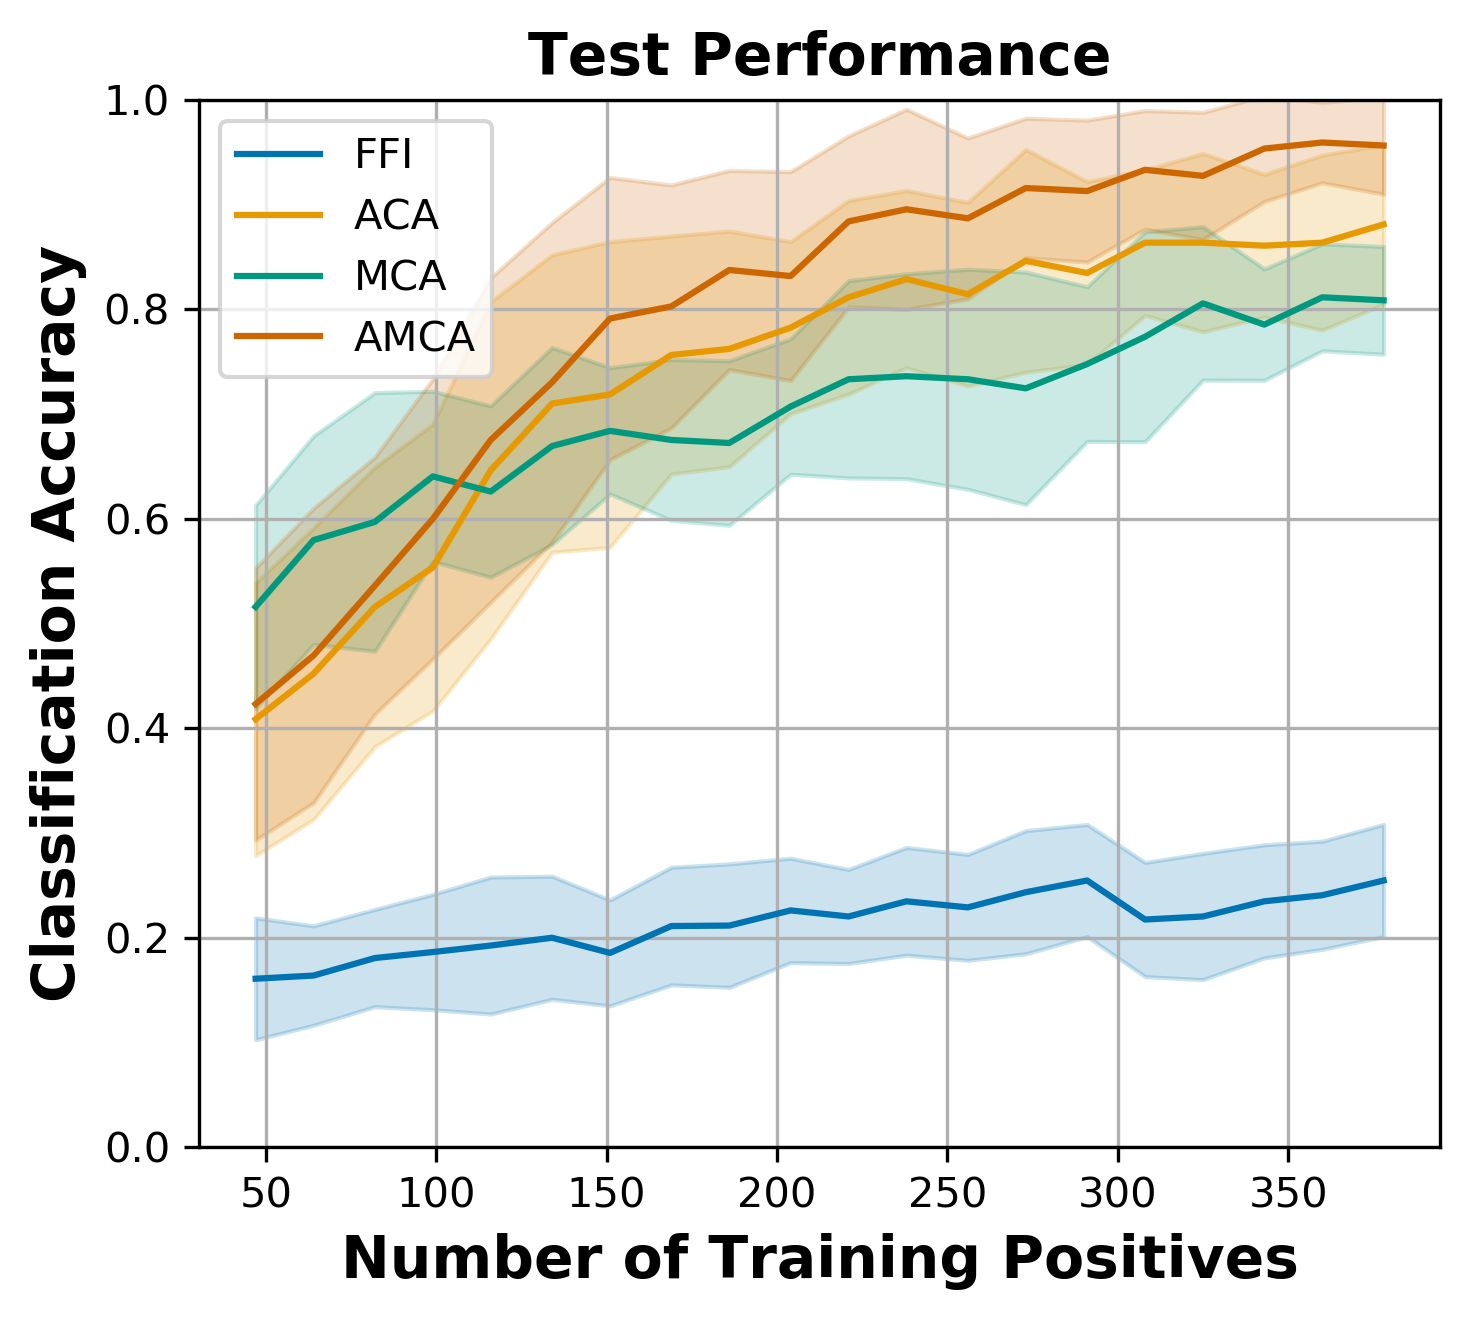

In [14]:
# accuracy = pd.read_csv('Data/qPCR_accuracy.csv')
methods = ['FFI', 'ACA', 'MCA', 'AMCA']

fig, ax = plt.subplots(1, 1, figsize=(5, 4.5), dpi=300)

ax.set_title('Test Performance', fontsize=14, weight='bold')
for i, method in enumerate(methods):
    df_ = accuracy[accuracy['Method'] == method]
    df_ = df_[df_.Accuracy >= 0.12] # remove values that have not converged
    
    sns.lineplot(x="TrainSize", y="Accuracy", 
                 data=df_[df_['Train/Test'] == 'Test'], 
                 label=method, ci='sd', ax=ax)

ax.set_ylabel('Classification Accuracy', fontsize=14, weight='bold')
ax.set_xlabel('Number of Training Positives', fontsize=14, weight='bold')
ax.set_ylim((0., 1.0))
# ax.set_xscale('log')
ax.grid(which="both", axis="both")

# plt.subplots_adjust(wspace=0.2)
plt.tight_layout()
plt.savefig('Images/qPCR_Effect_of_Volume.pdf')
plt.show()